In [1]:
import os
import keras
import numpy as np
import tensorflow as tf
from random import randint
import matplotlib.pyplot as plt
from keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
num_classes = 10   

train_images = np.float32(train_images)/255.
train_images = np.expand_dims(train_images, -1) 
test_images = np.float32(test_images)/255.  
test_images = np.expand_dims(test_images, -1)

train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels  = keras.utils.to_categorical(test_labels, num_classes)

In [3]:
print('Number of training images: ',train_images.shape[0])
print('Each training image is of size: ',train_images.shape[1:])
print('Number of training labels: ',train_labels.shape[0],'\n')
print('Number of test images: ',test_images.shape[0])
print('Each test image is of size: ',test_images.shape[1:])
print('Number of test labels: ',test_images.shape[0])

Number of training images:  60000
Each training image is of size:  (28, 28, 1)
Number of training labels:  60000 

Number of test images:  10000
Each test image is of size:  (28, 28, 1)
Number of test labels:  10000


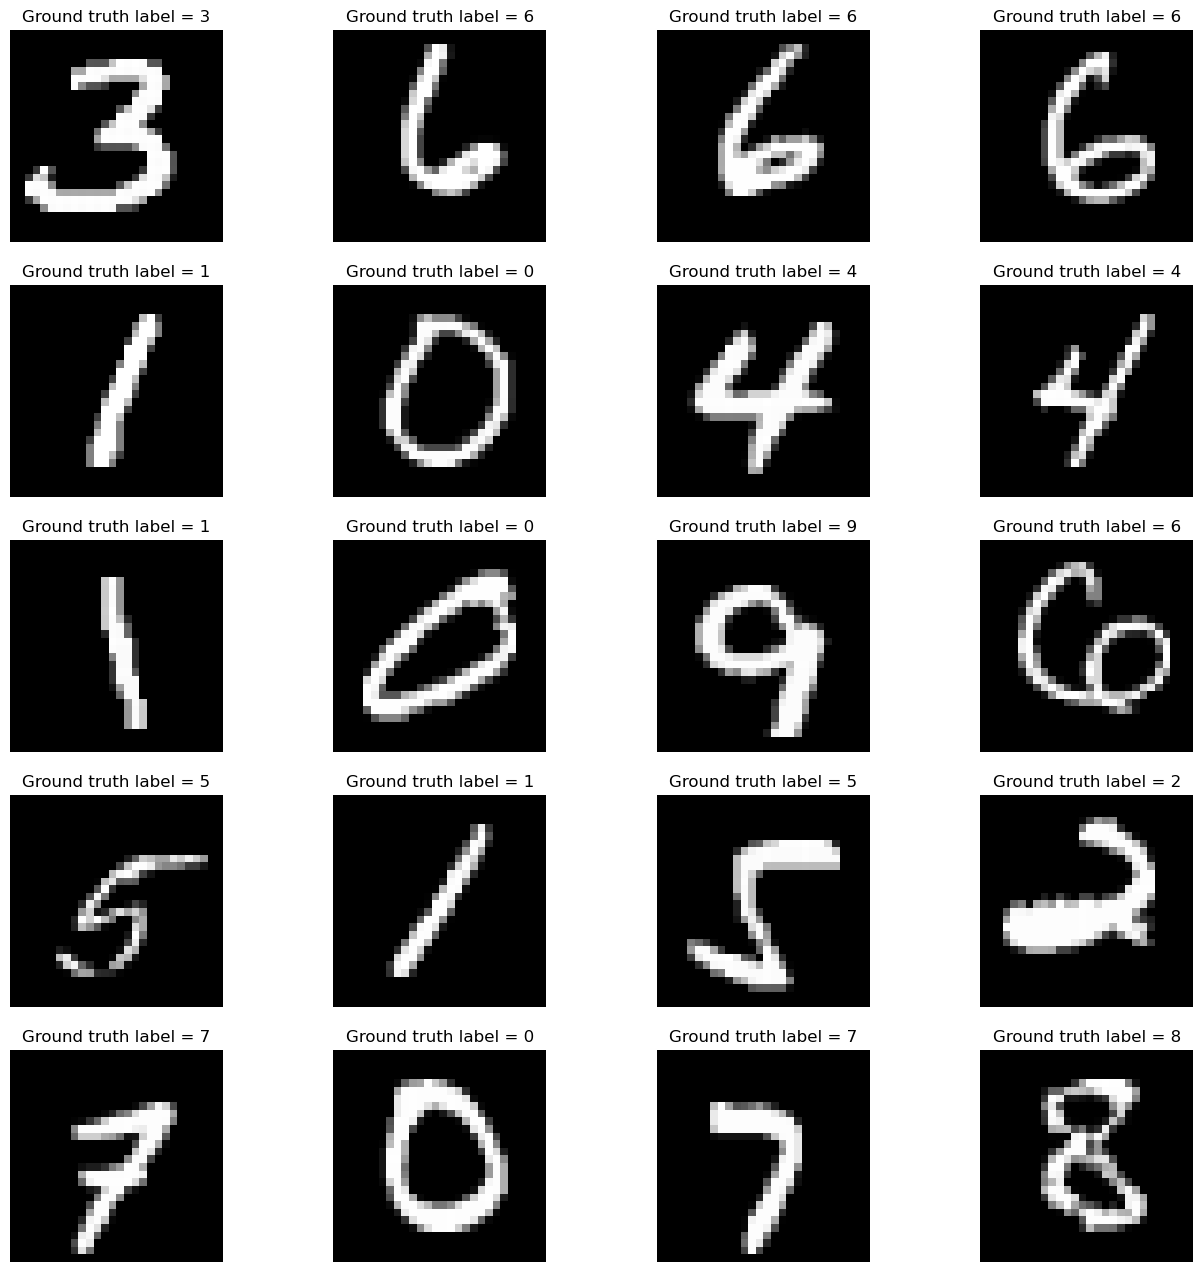

In [4]:
fig = plt.figure(figsize=(16, 16))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    # show random images from the dataset
    random_range = randint(0, train_images.shape[0]-1)
    img = train_images[random_range]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
    plt.title('Ground truth label = {}'.format(np.argmax(train_labels[random_range])))
    plt.axis('off')
plt.show()

In [5]:
input_shape = (28, 28, 1)     
num_filters = [16, 32, 64]
kernel_size = (3, 3)      
num_epochs  = 10         
learning_rate = 0.001      
batch_size = 16  

In [6]:
def model_architecture(input_shape:tuple, num_filters:list, kernel_size:tuple, num_classes:int):
    model = keras.Sequential(
    [
        Input(shape=input_shape),
        Conv2D(num_filters[0], kernel_size=kernel_size, activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(num_filters[1], kernel_size=kernel_size, activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(num_filters[2], kernel_size=kernel_size, activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(100, activation="relu"),
        Dense(num_classes, activation="softmax"), 
    ])

    return model

In [ ]:
# Build the model
model = model_architecture(input_shape, num_filters, kernel_size, num_classes)

callbacks = [keras.callbacks.EarlyStopping(patience=50, verbose=1),
             keras.callbacks.ModelCheckpoint(filepath='cnn_model.h5', monitor="val_loss", save_best_only=True, verbose=1)]

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(train_images, train_labels, 
          batch_size=batch_size, epochs=num_epochs, 
          validation_split=0.1, verbose=1,
          callbacks=callbacks)




Epoch 1/10


3369/3375 [============================>.] - ETA: 0s - loss: 0.2124 - accuracy: 0.9328
Epoch 1: val_loss improved from inf to 0.08934, saving model to cnn_model.h5
3375/3375 [==============================] - 30s 8ms/step - loss: 0.2122 - accuracy: 0.9328 - val_loss: 0.0893 - val_accuracy: 0.9737
Epoch 2/10
  21/3375 [..............................] - ETA: 17s - loss: 0.0628 - accuracy: 0.9792

D:\Anaconda\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3375/3375 [==============================] - ETA: 0s - loss: 0.0828 - accuracy: 0.9744
Epoch 2: val_loss improved from 0.08934 to 0.05630, saving model to cnn_model.h5
3375/3375 [==============================] - 25s 7ms/step - loss: 0.0828 - accuracy: 0.9744 - val_loss: 0.0563 - val_accuracy: 0.9823
Epoch 3/10
1649/3375 [=============>................] - ETA: 13s - loss: 0.0609 - accuracy: 0.9800

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

# first plot will be of accuracies
ax[0].plot(history.history['accuracy'], color='blue', label='training')
ax[0].plot(history.history['val_accuracy'], color='orange', label='validation')
ax[0].set_title('Model Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# second plot will be of the errors
ax[1].plot(history.history['loss'], color='blue', label='training')
ax[1].plot(history.history['val_loss'], color='orange', label='validation')
ax[1].set_title('Model Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['training', 'validation'])

plt.show()

score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


predictions = model.predict(test_images, verbose=0)

# Display
fig = plt.figure(figsize=(16, 16))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(test_images[i], cmap='gray')
    plt.title('Predicted label = {}\nConfidence = {:0.2f}'.format(np.argmax(predictions[i]), np.max(predictions[i])), pad=5)
    plt.axis('off')
fig.subplots_adjust(hspace=0.3)
plt.show()

In [ ]:
filepath = "numbers1/train/class2/ss1.png"

In [ ]:
def test_real_digit(filepath, model):
    try:
        from PIL import Image
        import PIL.ImageOps 
    except ModuleNotFoundError:
        print("<IMPORT ERROR>: Please install the `pillow` package")
        
    img = Image.open(filepath)
    img = img.resize((28, 28), Image.Resampling.LANCZOS) 
    img = img.convert('L') 
    img = PIL.ImageOps.invert(img) 
    img = np.expand_dims(img, -1)
    img = np.expand_dims(img, 0)  
    img = img.astype('float')/img.max()
    prediction = model.predict(img, verbose=0)[0]
    return img, prediction

im, test_pred = test_real_digit(filepath, model)

# Visualize it
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(im[0, :, :, 0], cmap='gray') 
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Predicted label = {}\nConfidence = {:0.2f}'.format(np.argmax(test_pred), np.max(test_pred)), pad=5)
plt.show()
